Populating the interactive namespace from numpy and matplotlib
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
[[0.03137255 0.00784314 0.6431373  0.61960787 0.6431373  0.5882353
  0.5568628  0.5372549  0.5058824  0.4901961  0.4784314  0.4666667
  0.44705886 0.42352945 0.43529415 0.4156863  0.40000004 0.35686275
  0.34117648 0.34901962]
 [0.03137255 0.00784314 0.654902   0.627451   0.654902   0.6
  0.5686275  0.54901963 0.52156866 0.5019608  0.4901961  0.4784314
  0.454902   0.43529415 0.4431373  0.42352945 0.40784317 0.37254903
  0.35686275 0.36078432]
 [0.03529412 0.00784314 0.67058825 0.63529414 0.6666667  0.6117647
  0.5803922  0.56078434 0.5372549  0.50980395 0.5058824  0.4901961
  0.4666667  0.45098042 0.454902   0.427451   0.41960788 0.38431376
  0.37647063 0.37254903]
 [0.03529412 0.00784314 0.6862745  0.6431373  0.6784314  0.62352943
  0.5882353  0.5764706  0.5529412  0.52156866 0.5137255  0.5019608
  0.47450984 0.4666667  0.46274513 0.4352941

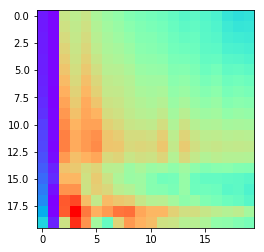

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import glob
import numpy as np
import os

%pylab inline

pwd = os.getcwd()
tfrecord_file_path = pwd + "/SAE_input2.tfrecord"
filename_queue = tf.train.string_input_producer(
                              tf.train.match_filenames_once(tfrecord_file_path),
                              shuffle=True, num_epochs=None)

reader = tf.TFRecordReader()
_, serialized_example = reader.read(filename_queue)
features = tf.parse_single_example(serialized_example,
                                       features={'data': tf.FixedLenFeature([], tf.string)}) 
img = tf.decode_raw(features['data'], tf.uint8)
img = tf.image.convert_image_dtype(img,tf.float32)
img = tf.reshape(img, [20, 20])
input_batch = tf.train.batch([img],batch_size=10,num_threads=1)

with tf.Session() as sess:   
    tf.local_variables_initializer().run()
    tf.global_variables_initializer().run()
    coord = tf.train.Coordinator()
    thread = tf.train.start_queue_runners(sess=sess,coord=coord)
    
    for i in range(1):
        _img = sess.run([img])
        
    plt.imshow(_img[0],cmap=plt.get_cmap('rainbow'))
    print(_img[0])
    
    coord.request_stop()
    coord.join(thread)
    